In [1]:
import pandas as pd
import numpy as np
import var
import predict as pre
import utils

print('初始化变量...')
names = ['user_id', 'item_id', 'rating', 'timestamp']
direct = 'dataset/ml-100k/'
trainingset_files = (direct + name for name in ('u1.base', 'u2.base', 'u3.base', 'u4.base', 'u5.base'))
testset_files = (direct + name for name in ('u1.test', 'u2.test', 'u3.test', 'u4.test', 'u5.test'))

if __name__ == '__main__':
    
    i = 0
    nums = 5
    alpha_set = [0, 0.1, 0.3, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1]
    rmse_blendCF = {alpha:[] for alpha in alpha_set}
    rmse_blendCF_train = {alpha:[] for alpha in alpha_set}
    
    for trainingset_file, testset_file in zip(trainingset_files, testset_files):
        i += 1
        print('------ 第%d/%d组样本 ------' % (i, nums))
        df = pd.read_csv(trainingset_file, sep='\t', names=names)
        
        var.ratings = np.zeros((var.n_users, var.n_items))
        print('载入训练集' + trainingset_file)
        for row in df.itertuples():
            var.ratings[row[1]-1, row[2]-1] = row[3]
          
        print('计算训练集各项统计数据...')
        utils.cal_mean()

        print('计算相似度矩阵...')
        var.user_similarity = utils.cal_similarity(kind='user')
        var.item_similarity = utils.cal_similarity(kind='item')
        print('计算完成')
        
        predictions_blendCF_train = {alpha:[] for alpha in alpha_set}
        targets = []
        print('在训练集上测试...')
        for row in df.itertuples():
            user, item, actual = row[1]-1, row[2]-1, row[3]
            for alpha in alpha_set:
                predictions_blendCF_train[alpha].append(pre.predict_blend(user, item, alpha=alpha))
            targets.append(actual)
        for alpha in alpha_set:
            rmse_blendCF_train[alpha].append(utils.rmse(np.array(predictions_blendCF_train[alpha]), np.array(targets)))    

        print('载入测试集' + testset_file)
        test_df = pd.read_csv(testset_file, sep='\t', names=names)        
        predictions_blendCF = {alpha:[] for alpha in alpha_set}
        targets = []
        print('测试集规模为 %d' % len(test_df))
        print('在测试集上测试...')
        for row in test_df.itertuples():
            user, item, actual = row[1]-1, row[2]-1, row[3]
            for alpha in alpha_set:
                predictions_blendCF[alpha].append(pre.predict_blend(user, item, alpha=alpha))
            targets.append(actual)
        for alpha in alpha_set:
            rmse_blendCF[alpha].append(utils.rmse(np.array(predictions_blendCF[alpha]), np.array(targets)))          
        print('测试完成')
        
    print('------ 测试结果 ------')
    
    print('融合模型中，不同alpha在训练集上的RMSE:')
    for alpha in sorted(alpha_set):
        print('alpha = %.2f:   %.4f' % (alpha, np.mean(rmse_blendCF_train[alpha])))
        
    print('融合模型中，不同alpha在测试集上的RMSE:')
    for alpha in sorted(alpha_set):
        print('alpha = %.2f:   %.4f' % (alpha, np.mean(rmse_blendCF[alpha])))
    

初始化变量...
------ 第1/5组样本 ------
载入训练集dataset/ml-100k/u1.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u1.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第2/5组样本 ------
载入训练集dataset/ml-100k/u2.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u2.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第3/5组样本 ------
载入训练集dataset/ml-100k/u3.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u3.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第4/5组样本 ------
载入训练集dataset/ml-100k/u4.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u4.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 第5/5组样本 ------
载入训练集dataset/ml-100k/u5.base
计算训练集各项统计数据...
计算相似度矩阵...
计算完成
在训练集上测试...
载入测试集dataset/ml-100k/u5.test
测试集规模为 20000
在测试集上测试...
测试完成
------ 测试结果 ------
融合模型中，不同alpha在训练集上的RMSE:
alpha = 0.00:   0.8225
alpha = 0.10:   0.8108
alpha = 0.30:   0.7907
alpha = 0.50:   0.7754
alpha = 0.60:   0.7696
alpha = 0.65:   0.7672
alpha = 0.70:   0.7651
alpha = 0.75:   0.7634
alpha = 

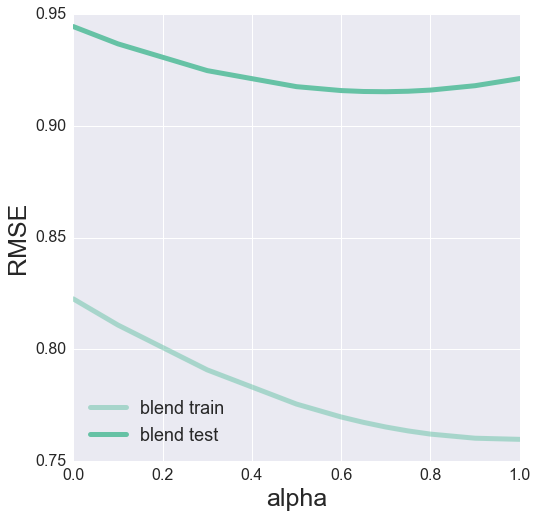

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# alpha_set
rmse_blend_testlist = [np.mean(rmse_blendCF[alpha]) for alpha in alpha_set]
rmse_blend_trainlist = [np.mean(rmse_blendCF_train[alpha]) for alpha in alpha_set]

pal = sns.color_palette("Set2", 2)

plt.figure(figsize=(8, 8))
plt.plot(alpha_set, rmse_blend_trainlist, c=pal[0], label='blend train', alpha=0.5, linewidth=5)
plt.plot(alpha_set, rmse_blend_testlist, c=pal[0], label='blend test', linewidth=5)

plt.legend(loc='best', fontsize=18)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('alpha', fontsize=25);
plt.ylabel('RMSE', fontsize=25);